In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/incidental_or_influential/data/SDP_train.csv')

In [ ]:
data.shape

(3000, 8)

In [ ]:
data.head()

,unique_id,core_id,citing_title,citing_author,cited_title,cited_author,citation_context,citation_influence_label
0,CC1,158977742,Ontology-Based Recommendation of Editorial Pro...,Thiviyan Thanapalasingam,Web search personalization with ontological us...,Sieg,They usually generate user models that describ...,0
1,CC2,158977742,Ontology-Based Recommendation of Editorial Pro...,Thiviyan Thanapalasingam,Exploring Scholarly Data with Rexplore,Osborne,The Computer Science Ontology (CSO)[3]is a lar...,0
2,CC3,158977742,Ontology-Based Recommendation of Editorial Pro...,Thiviyan Thanapalasingam,Klink-2: Integrating Multiple Web Sources to G...,Osborne,"In order to do so, we characterized all SN pub...",0
3,CC4,158977742,Ontology-Based Recommendation of Editorial Pro...,Thiviyan Thanapalasingam,Forecasting the Spreading of Technologies in R...,Osborne,"This API supports a number of applications, in...",1
4,CC5,158977742,Ontology-Based Recommendation of Editorial Pro...,Thiviyan Thanapalasingam,Supporting Springer Nature Editors by means of...,Osborne,It works according to three main steps:1) It r...,1


0    1568
1    1432
Name: citation_influence_label, dtype: int64


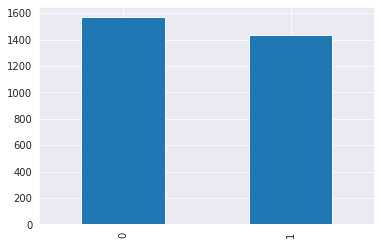

In [ ]:
print(data['citation_influence_label'].value_counts())
data['citation_influence_label'].value_counts().plot(kind='bar')

In [ ]:
text_len = [len(txt.split()) for txt in data['citation_context']]

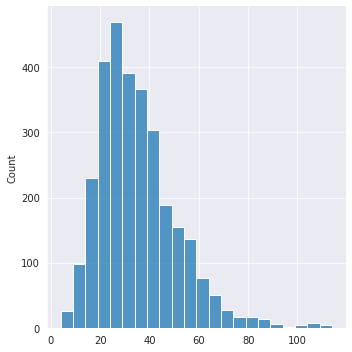

In [ ]:
sns.displot(text_len, binwidth=5)

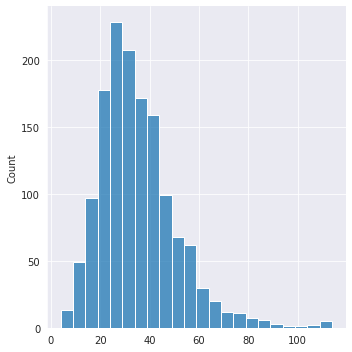

In [ ]:
data_1 = data[data['citation_influence_label']==1]
text_len1 = [len(txt.split()) for txt in data_1['citation_context']]
sns.displot(text_len1, binwidth=5)

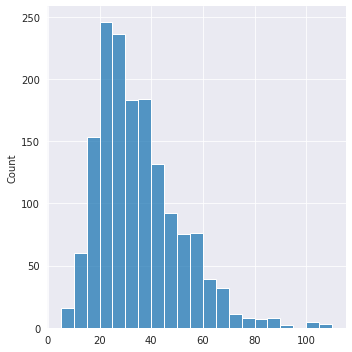

In [ ]:
data_0 = data[data['citation_influence_label']==0]
text_len0 = [len(txt.split()) for txt in data_0['citation_context']]
sns.displot(text_len0, binwidth=5)

In [ ]:
pd.set_option('display.max_colwidth', None)
data[['citing_title', 'cited_title', 'citation_context', 'citation_influence_label']].head(5)

,citing_title,cited_title,citation_context,citation_influence_label
0,Ontology-Based Recommendation of Editorial Products,Web search personalization with ontological user profiles,They usually generate user models that describe user interests according to a set of features #AUTHOR_TAG,0
1,Ontology-Based Recommendation of Editorial Products,Exploring Scholarly Data with Rexplore,The Computer Science Ontology (CSO)[3]is a large-scale and granular ontology of research topics that was created automatically by running the Klink-2 algorithm [1]on the Rexplore dataset #AUTHOR_TAG.,0
2,Ontology-Based Recommendation of Editorial Products,Klink-2: Integrating Multiple Web Sources to Generate Semantic Topic Networks,"In order to do so, we characterized all SN publications according to their associated research topics by exploiting the Computer Science Ontology (CSO), a large-scale automatically generated taxonomy of research areas #AUTHOR_TAG",0
3,Ontology-Based Recommendation of Editorial Products,Forecasting the Spreading of Technologies in Research Communities,"This API supports a number of applications, including Smart Book Recommender, Smart Topic Miner [5], the Technology-Topic Framework #AUTHOR_TAG, a system that forecasts the propagation of technologies across research communities, and the Pragmatic Ontology Evolution Framework [7], an approach to ontology evolution that is able to select new concepts on the basis of their contribution to specific computational tasks",1
4,Ontology-Based Recommendation of Editorial Products,Supporting Springer Nature Editors by means of Semantic Technologies,"It works according to three main steps:1) It represents journals, books, and conferences according to the metadata of their chapters/articles and uses the Smart Topic API #AUTHOR_TAG to characterize each of them with a semantically enhanced topic vector",1


In [ ]:
data['merged_text'] = data['citing_title'] + '. ' + data['cited_title'] + '. ' + data['citation_context']

In [ ]:
data[['merged_text', 'citation_influence_label']].head(5)

,merged_text,citation_influence_label
0,Ontology-Based Recommendation of Editorial Products. Web search personalization with ontological user profiles. They usually generate user models that describe user interests according to a set of features #AUTHOR_TAG,0
1,Ontology-Based Recommendation of Editorial Products. Exploring Scholarly Data with Rexplore. The Computer Science Ontology (CSO)[3]is a large-scale and granular ontology of research topics that was created automatically by running the Klink-2 algorithm [1]on the Rexplore dataset #AUTHOR_TAG.,0
2,"Ontology-Based Recommendation of Editorial Products. Klink-2: Integrating Multiple Web Sources to Generate Semantic Topic Networks. In order to do so, we characterized all SN publications according to their associated research topics by exploiting the Computer Science Ontology (CSO), a large-scale automatically generated taxonomy of research areas #AUTHOR_TAG",0
3,"Ontology-Based Recommendation of Editorial Products. Forecasting the Spreading of Technologies in Research Communities. This API supports a number of applications, including Smart Book Recommender, Smart Topic Miner [5], the Technology-Topic Framework #AUTHOR_TAG, a system that forecasts the propagation of technologies across research communities, and the Pragmatic Ontology Evolution Framework [7], an approach to ontology evolution that is able to select new concepts on the basis of their contribution to specific computational tasks",1
4,"Ontology-Based Recommendation of Editorial Products. Supporting Springer Nature Editors by means of Semantic Technologies. It works according to three main steps:1) It represents journals, books, and conferences according to the metadata of their chapters/articles and uses the Smart Topic API #AUTHOR_TAG to characterize each of them with a semantically enhanced topic vector",1


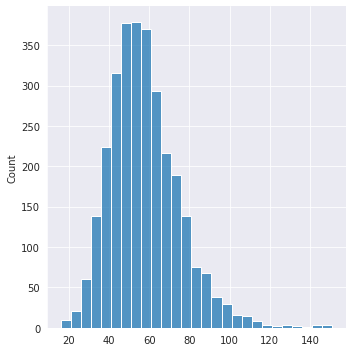

In [ ]:
text_len = [len(txt.split()) for txt in data['merged_text']]
sns.displot(text_len, binwidth=5)

In [ ]:
data[['merged_text']].shape

(3000, 1)

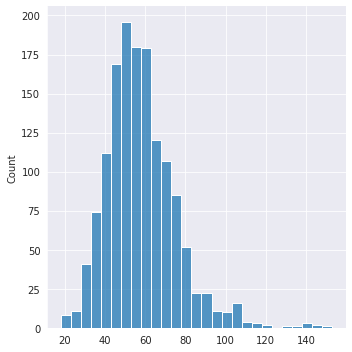

In [ ]:
data_1 = data[data['citation_influence_label']==1]
text_len1 = [len(txt.split()) for txt in data_1['merged_text']]
sns.displot(text_len1, binwidth=5)

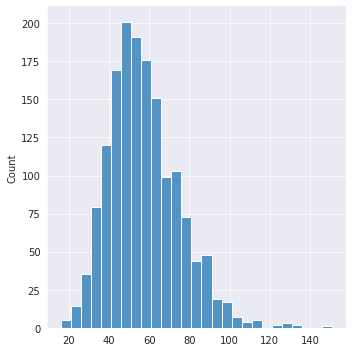

In [ ]:
data_0 = data[data['citation_influence_label']==0]
text_len0 = [len(txt.split()) for txt in data_0['merged_text']]
sns.displot(text_len0, binwidth=5)

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
stopwords = stopwords.words('english')

class Preprocessing():
    def __init__(self):
        pass
    
    def remove_brackets(self, text):

        text = re.sub(r'\([^)]*\)', '', text)
        return text
    
    def tokenize_text(self, text):
        
        tokenized_text = word_tokenize(text)
        return tokenized_text
    
    def remove_stopwords(self, text):

        final_text = [word for word in text if word not in stopwords]
        return final_text
    
    def lemmatize(self, text):

        lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
        return lemmatized_text
    
    def preprocess(self, text):

        text = text.replace('#AUTHOR_TAG', ' ')
        text = self.remove_brackets(text)
        tokenized_text = self.tokenize_text(text)
        filtered_text = self.remove_stopwords(tokenized_text)
        final_text = self.lemmatize(filtered_text)

        return final_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
preprocessed_data = []
labels = []
preprocessor = Preprocessing()

for i, row in tqdm(data.iterrows()):
    final_text = preprocessor.preprocess(row['citation_context'])

    preprocessed_data.append(final_text)
    labels.append(row['citation_influence_label'])

3000it [00:03, 806.94it/s] 


In [ ]:
len(preprocessed_data), len(labels)

(3000, 3000)

In [ ]:
print(preprocessed_data[5])

['propose', 'hybrid', 'recommendation', 'model', 'user', 'preference', 'described', 'term', 'semantic', 'concept', 'defined', 'domain', 'ontology']
